In [18]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
data= pd.read_csv("predict_energy_consumption.csv")
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [21]:
X = data[["temperature",	"humidity",	"wind_speed",	"solar_irradiance"]].values
Y = data["energy_consumption"].values

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)), #Input layer
    Dense(32, activation="relu"), #hidden layer with 32 neurons
    Dense(1)
])

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
#mean squared error and mean absolute error

In [26]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32,
                    validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 86450.5781 - mae: 264.3396 - val_loss: 83409.0000 - val_mae: 258.4560
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 91709.6250 - mae: 275.2490 - val_loss: 82616.1250 - val_mae: 256.9156
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85415.6328 - mae: 263.8206 - val_loss: 81438.1406 - val_mae: 254.6075
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87171.0859 - mae: 264.4346 - val_loss: 79660.0859 - val_mae: 251.0843
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85159.4375 - mae: 261.6673 - val_loss: 77087.6250 - val_mae: 245.8972
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78602.5312 - mae: 249.8317 - val_loss: 73548.7109 - val_mae: 238.5623
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76042.8203 - mae: 243.2438 - val_loss: 68903.5156 - val_mae: 228.5728
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67974.7578 - mae: 227.6933 - val_loss: 63146.

In [27]:
test_loss, test_mae = model.evaluate(X_test, Y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae: .2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17841.9004 - mae: 115.1786  
Test Mean Absolute Error:  115.63


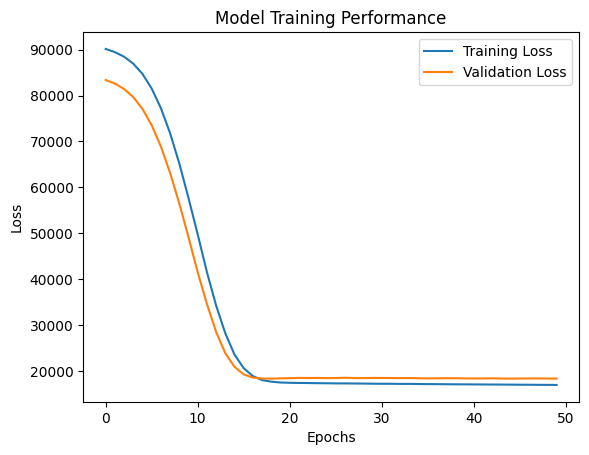

In [28]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Training Performance")
plt.legend()
plt.show()

In [29]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[285.1223 ],
       [250.47652],
       [264.96088],
       [210.22054],
       [336.7787 ],
       [315.8601 ],
       [315.40625],
       [290.59485],
       [288.1157 ],
       [282.61298],
       [238.36284],
       [268.50336],
       [274.72723],
       [242.1289 ],
       [296.0418 ],
       [313.20624],
       [257.96478],
       [313.04205],
       [301.77637],
       [241.73587],
       [273.02026],
       [285.65396],
       [279.82474],
       [275.2243 ],
       [250.57031],
       [247.13109],
       [264.3895 ],
       [322.0475 ],
       [315.80533],
       [265.63965],
       [236.43268],
       [315.31604],
       [304.20346],
       [270.14264],
       [307.07007],
       [293.30917],
       [214.90627],
       [266.2398 ],
       [284.99182],
       [250.83105],
       [242.36696],
       [251.33354],
       [248.04028],
       [258.26312],
       [264.21484],
       [261.707  ],
       [276.05237],
       [253.48972],
       [291.4915 ],
       [298.52792],


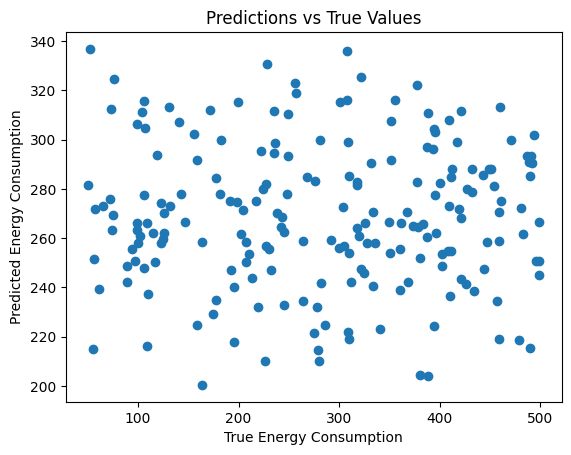

In [30]:
plt.scatter(Y_test, predictions)
plt.xlabel("True Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Predictions vs True Values")
plt.show()